In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)
import time

In [3]:
eps  = 1e-4 # This is the time scale.
tend = 400*eps
dt   = 0.1*eps

numNeurons = 500
displaynum = min(10,numNeurons)
neurons = []


for i in range(numNeurons):
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend, eps=eps, a=np.random.uniform(0.6,0.9),b=np.random.uniform(0.5,0.9),tau=np.random.uniform(10,14),I=I)
    n.Initialize([-2,0])
    n.SetNoise(0,0.0)
    n.SetFlow(n.FHNFlow)
    n.SetSynapseLimit(np.random.uniform(980,1020))
    neurons.append(n)
    
b = Brain(neurons=neurons,dt=dt,tend=tend,connectionscale=1000)
for i in tnrange(500,desc='Syn Dev'):
    b.DevelopSynapseNetwork()
#b.Simulate()

In [4]:
plt.rcParams["figure.figsize"] = (8,8)
vis = Visualization(network=b._Network,neurons=b._Neurons, synapsecount=b._SynapseCountHistory)
vis._EdgeLabels = b._EdgeLabels
vis._NetworkEdgeWeightFactor = 4
#vis.DrawNetwork(edgelabels=False)

Displaying 0 active neurons. 0 more active neurons are present.


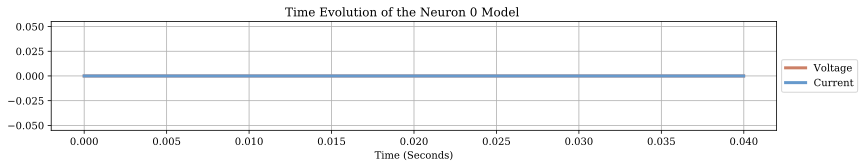

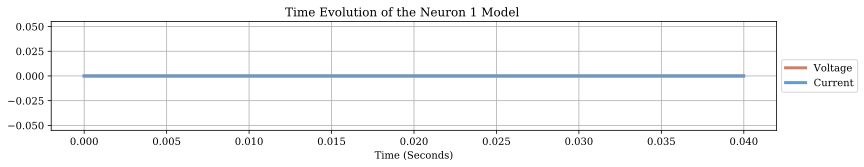

Displaying 2 inactive neurons. 498 more inactive neurons are present.


In [5]:
plt.rcParams["figure.figsize"] = (13, 2)
b.CollectActiveNeurons()
ActiveNeurons = b._ActiveNeurons;
numberToShow = min(5,len(ActiveNeurons))
for n in range(numberToShow):
    ActiveNeurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8]])
print("Displaying {} active neurons. {} more active neurons are present.".format(numberToShow,len(ActiveNeurons)-numberToShow))

InactiveNeurons = b._InactiveNeurons;
numberToShow = min(2,len(InactiveNeurons))
for n in range(numberToShow):
    InactiveNeurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8]])
print("Displaying {} inactive neurons. {} more inactive neurons are present.".format(numberToShow,len(InactiveNeurons)-numberToShow))

In [6]:
plt.rcParams["figure.figsize"] = (12, 2)
#vis.PlotSynapseRank()
print(b._SynapseCount)

500.38099999507943


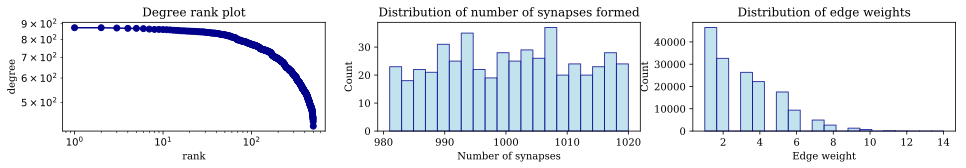

In [7]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotConnectivityProperties()

In [8]:
plt.rcParams["figure.figsize"] = (16,2)
vis.PlotDegreeDistribution()

No connections at all


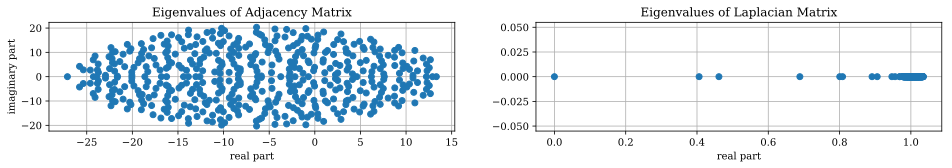

In [9]:
plt.rcParams["figure.figsize"] = (12,5)
vis.PlotEigenValues(numbertodrop=13)

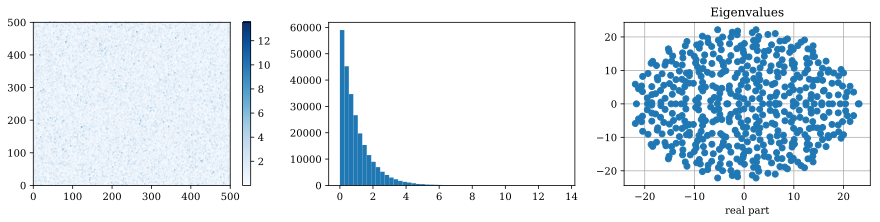

In [14]:
plt.rcParams["figure.figsize"] = (15,3)
N = 500
L=np.random.exponential(1,(N,N))
#L=np.random.normal(0,2,(1000,1000));
H=np.ndarray.flatten(L)
eigs = np.linalg.eigvals(L)

reals = [np.real(n) for n in eigs]
imag  = [np.imag(n) for n in eigs]

ax1 = plt.subplot(131)
p=ax1.pcolorfast(L,cmap='Blues')
plt.colorbar(p)

ax2=plt.subplot(132)
plt.hist(H,50)

ax3=plt.subplot(133)
ps=plt.plot(reals[1:],imag[1:],'o')
plt.grid(True)
plt.title('Eigenvalues')
plt.xlabel('real part')

plt.show()

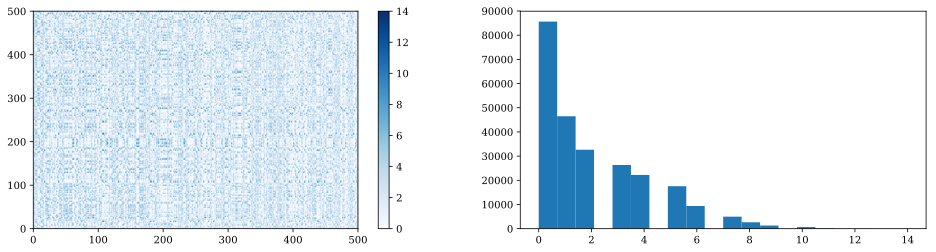

In [17]:
plt.rcParams["figure.figsize"] = (16,4)
vis.PlotAdjacencyMatrix()

In [13]:
len(vis.ComputeEigenValues(matrix="Adjacency",numbertodrop=10))

490